## Audrey Warn
Homework 2

In [43]:
%matplotlib inline
import numpy as np
from numpy import random
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import chi2
import pandas as pd
import seaborn as sns

1) A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

Part a: probability of rolling snake eyes
There are two ones on six sided die implying the probability of rolling snake eyes is $1/(36)$

Part b: rolling 7s
There's 6+1 or 3+4 or 5+2 
so P(7)=P(16,34,25,52,43,61)
=6/36
=1/6

Part c: $(1/36)/(1/6)$
$=(1/6)$
So rolling 7s is six times more likely.

2) Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram)

In [60]:
n = [1,2,3,4,5,6]
v = [1/6,1/6,1/6,1/6,1/6,1/6]
p = []
conv = np.convolve(n,v, mode='full')

for a in range(6):
    for b in range(6):
        val = n[a]+n[b]
        p.append(val)

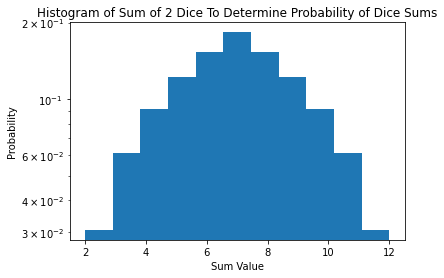

In [62]:
plt.hist(p, density = True, bins=11)
plt.xlabel('Sum Value')
plt.ylabel('Probability')
plt.title('Histogram of Sum of 2 Dice To Determine Probability of Dice Sums')
plt.yscale('log')
plt.show()

3) Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.

In [65]:
print('Mean of the disbtribution of the sum of 2 dice',np.mean(p))
print('Variance of the distribution of the sum of 2 dice',np.var(p))

Mean of the disbtribution of the sum of 2 dice 7.0
Variance of the distribution of the sum of 2 dice 5.833333333333333


4) Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.

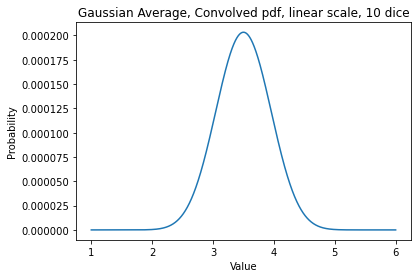

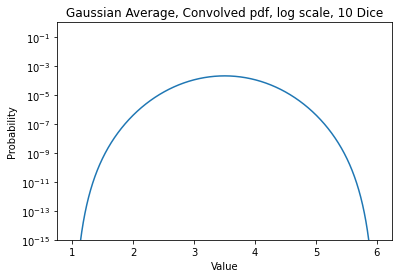

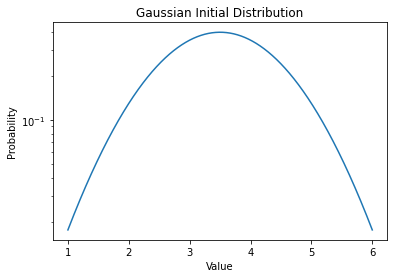

In [66]:
var = np.linspace(1,6,2000)

dist = scipy.stats.norm.pdf(var, loc = 3.5)

base = scipy.stats.norm.pdf(dist)
base = base/sum(base)
comb=base

k=10
for i in range (k):
    comb = np.convolve(comb,base,mode='full')
    
plt.title('Gaussian Average, Convolved pdf, linear scale, 10 dice')
cx = np.linspace(1,6,len(comb))
plt.plot(cx,comb)
plt.ylabel('Probability')
plt.xlabel('Value')
plt.show()


plt.title('Gaussian Average, Convolved pdf, log scale, 10 Dice')
plt.plot(cx, comb)
plt.ylim([1e-15,1])
plt.yscale('log')
plt.ylabel('Probability')
plt.xlabel('Value')
plt.show()

plt.title('Gaussian Initial Distribution')
plt.plot(var,dist)
plt.yscale('log')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

5) Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.

As a result of Central Limit Theorem, we know that as you sum or average distributions enough times, the distributions start to look more and more like normal (Gaussian) distributions. This works for any kind of distribution, so if you start with a distribution that is already normal, you can't approach a more normal distribution, so the resulting sum or average distribution of an initially Gaussian distribution will stay as a normal distribution.

The resulting distribution of the sum becomes wider, so the standard deviation increases. The resulting distribution of the average becomes narrower, so the standard deviation decreases.

This is an important result because if you average a signal over time, as we have just seen the standard deviation will get smaller and smaller, which will help decrease the uncertainty (or increase the certainty) in the data leading to a more confident measurement of the signal you are looking at.